In [5]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [6]:
us_df = pd.read_csv("us-counties.csv")
us_df['date'] = pd.to_datetime(us_df['date'])

In [3]:
# just to have an over all idea on how the actual table looks
# tests 

#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [7]:
top_counties = us_df.groupby(['county', 'state'], as_index=False).max()

# important to restreict the values to 10 here otherwise the code will err in question3 due to performance!!
top_counties = top_counties.sort_values(by='cases', ascending = False).head(10)
top_counties

,county,state,date,fips,cases,deaths
1756,Los Angeles,California,2021-10-03,6037.0,1463743,26153.0
2115,New York City,New York,2021-10-03,NaN,1085590,34284.0
1830,Maricopa,Arizona,2021-10-03,4013.0,700319,11558.0
1958,Miami-Dade,Florida,2021-10-03,12086.0,661638,8504.0
650,Cook,Illinois,2021-10-03,17031.0,620602,11603.0
1241,Harris,Texas,2021-10-03,48201.0,558618,8414.0
736,Dallas,Texas,2021-10-03,48113.0,389318,4931.0
2561,San Diego,California,2021-10-03,6073.0,373289,4078.0
2490,Riverside,California,2021-10-03,6065.0,363950,5004.0
2560,San Bernardino,California,2021-10-03,6071.0,351963,5545.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [8]:
#removing county column and selecting others to just keep the table focused on state level metric
#approach similar to question 1
top_state = us_df.groupby('state')[['cases','deaths','date']].max()

top_state = top_state.sort_values(by='cases', ascending=False)
top_state.head(n=5)

,cases,deaths,date
state,,,
California,1463743,26153.0,2021-10-03
New York,1085590,34284.0,2021-10-03
Arizona,700319,11558.0,2021-10-03
Florida,661638,11799.0,2021-10-03
Illinois,620602,11603.0,2021-10-03


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [9]:
top_county_spike=us_df[(us_df['county'].isin(top_counties['county'])) & (us_df['state'].isin(top_counties['state']))]

def calc_incidences(row, top_county_spike):
    prev_index = (row.name[0], pd.to_datetime(row.name[1])-pd.offsets.Day(1))
    if prev_index in top_county_spike.index: 
        return row['cases'] - top_county_spike.loc[prev_index]['cases']
    else:
        return 0

top_county_spike = top_county_spike.set_index(['county','date'])
top_county_spike['incidences'] = top_county_spike.apply(lambda x: calc_incidences(x,top_county_spike),axis=1)
top_county_spike.sort_values('incidences', ascending=False).head(n=10)

state     fips   cases   deaths  incidences
county      date                                                        
Los Angeles 2020-12-26  California   6037.0  706712   9438.0       29174
            2020-12-16  California   6037.0  566185   8568.0       22236
Miami-Dade  2021-08-13     Florida  12086.0  583845   6472.0       21655
            2021-08-20     Florida  12086.0  603878   6472.0       20033
Los Angeles 2021-01-01  California   6037.0  790895  10552.0       19980
Miami-Dade  2021-08-06     Florida  12086.0  562190   6472.0       19709
Los Angeles 2021-01-07  California   6037.0  871749  11545.0       19239
            2021-01-08  California   6037.0  889787  11863.0       18038
            2021-01-14  California   6037.0  975693  13234.0       16802
            2021-01-09  California   6037.0  906554  12084.0       16767

#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [10]:
top_county_spike = top_county_spike.reset_index()
p_df = top_county_spike.iloc[top_county_spike.groupby('county')['incidences'].idxmax()]
p_df = p_df.set_index('county')
p_df = p_df.sort_values(by = 'incidences', ascending=False)
p_df.head(n=10)

,date,state,fips,cases,deaths,incidences
county,,,,,,
Los Angeles,2020-12-26,California,6037.0,706712,9438.0,29174
Miami-Dade,2021-08-13,Florida,12086.0,583845,6472.0,21655
New York City,2021-03-24,New York,NaN,816580,30793.0,16715
San Diego,2021-07-01,California,6073.0,298015,3780.0,15453
Harris,2020-09-21,Texas,48201.0,137946,2505.0,14129
Maricopa,2021-01-03,Arizona,4013.0,342994,5239.0,11761
Riverside,2021-01-12,California,6065.0,227827,2294.0,8341
San Bernardino,2020-12-16,California,6071.0,137548,1304.0,8026
Cook,2020-11-01,Illinois,17031.0,193102,5500.0,6697


#### Question 5: Plot an incidence curve for the County with the highest peak.

<AxesSubplot:xlabel='date', ylabel='Incidences'>

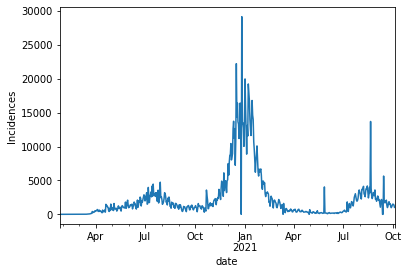

In [11]:
top_county_spike= top_county_spike.set_index(['county','date'])
plotit = top_county_spike.loc['Los Angeles']['incidences'].plot()
plotit.set_ylabel("Incidences")
plotit

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

[]

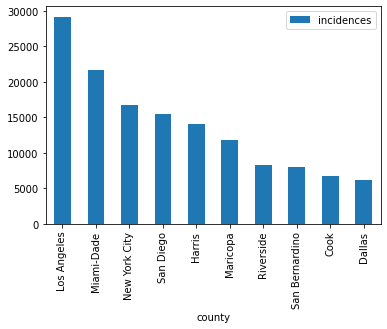

In [12]:
p_df = p_df.head(n=10)
incidence = p_df[['incidences']].plot.bar()
incidence.plot()